## Observations and Insights 

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head(2)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17


In [2]:
study_results.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [3]:
# Combine the data into a single dataset
complete_mouse_data_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
complete_mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
distinct_mice=complete_mouse_data_df["Mouse ID"].nunique()
distinct_mice

249

In [5]:
# number of mouse ids after merge
mouse_count=complete_mouse_data_df["Mouse ID"].count()
mouse_count

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Optional: Get all the data for the duplicate mouse ID. 

duplicate = complete_mouse_data_df[complete_mouse_data_df.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df= complete_mouse_data_df.drop_duplicates()
clean_mouse_df.tail(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [8]:
# Checking the number of mice in the clean DataFrame.
distinct_mice_clean=clean_mouse_df["Mouse ID"].nunique()
distinct_mice_clean


249

In [9]:
# number of mouse ids after duplicates removed
mouse_count_clean=clean_mouse_df["Mouse ID"].count()
mouse_count_clean

1892

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

clean_mouse_df.keys()

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [11]:
# groupby tumor regimen

tumor_regimen_df=clean_mouse_df.groupby(["Drug Regimen"])

tumor_volume = tumor_regimen_df["Tumor Volume (mm3)"]

#tumor_regimen_df['Tumor Volume (mm3)']=pd.to_numeric(tumor_regimen_df['Tumor Volume (mm3)'])

In [12]:
mean_tumor_volume = (tumor_volume).mean()
mean_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.368318
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# median_tumor_volume = tumor_regimen_df["Tumor Volume (mm3)"].median()
# median_tumor_volume

median_tumor_volume = (tumor_volume).median()
median_tumor_volume



Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#var_tumor_vol  = np.var(tumor_volume,ddof = 0)

#website for variance : https://www.datasciencemadesimple.com/variance-function-python-pandas-dataframe-row-column-wise-variance/

var_tumor_volume = (tumor_volume).var()
var_tumor_volume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.278090
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [17]:
SEM_tumor_volume = (tumor_volume).sem()
SEM_tumor_volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.514041
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [175]:
# SEM=sts.sem((tumor_volume), axis = 0, ddof = 0)
# SEM

In [18]:
STD_tumor_volume = (tumor_volume).std()
STD_tumor_volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.502160
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [19]:
#variables into dataframe
Summary_stats_df=pd.DataFrame({ "Mean":mean_tumor_volume,
                                "Median":median_tumor_volume,
                                "Varaince":var_tumor_volume,
                                "Standard Deviation": STD_tumor_volume,
                                "Standard Deviation of Mean":SEM_tumor_volume})
Summary_stats_df

,Mean,Median,Varaince,Standard Deviation,Standard Deviation of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen SEM is scipy


In [20]:
#example from panda homework = group_test=purchase_df.groupby(["Gender"]).agg(['count', np.mean, sum,])["Price"].rename(columns={'count':'Purchase Count','mean' : 'Average Purchase Price', 'sum': 'Total Purchase Value'})
tumor_regimen_agg=clean_mouse_df.groupby(["Drug Regimen"]).agg([np.mean,np.median,np.var,np.std,'sem'])["Tumor Volume (mm3)"].reset_index()
tumor_regimen_agg

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [21]:
# Using the aggregation method, produce the same summary statistics in a single line
# source:https://www.geeksforgeeks.org/how-to-convert-pandas-dataframe-into-a-list/
list =tumor_regimen_agg.values.tolist()
list

[['Capomulin',
  40.67574114100001,
  41.557808879999996,
  24.947764120254785,
  4.994773680584014,
  0.32934562340083046],
 ['Ceftamin',
  52.59117180960677,
  51.77615728000001,
  39.29017727327859,
  6.268187718414198,
  0.4698205327526109],
 ['Infubinol',
  52.88479510859551,
  51.82058438,
  43.128684128836106,
  6.567243267066944,
  0.4922356938011386],
 ['Ketapril',
  55.23563764047869,
  53.698742644999996,
  68.55357711244599,
  8.279708757706759,
  0.6038598237739697],
 ['Naftisol',
  54.331564658333306,
  52.509284609999995,
  66.17347898736506,
  8.134708291473338,
  0.5964657512424235],
 ['Placebo',
  54.03358078635358,
  52.28893409,
  61.168082936697,
  7.821002681031186,
  0.5813305510593875],
 ['Propriva',
  52.368317986,
  50.909964985,
  42.27808961958156,
  6.502160380948901,
  0.5140409128876656],
 ['Ramicane',
  40.2167450667105,
  40.67323554,
  23.486703952095297,
  4.8463082807530204,
  0.3209546065084819],
 ['Stelasyn',
  54.23314911988949,
  52.43173664,
  5

## Bar and Pie Charts

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurements_df=clean_mouse_df.groupby(["Drug Regimen"]).agg(['count'])["Tumor Volume (mm3)"].reset_index()
measurements_df

,Drug Regimen,count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,160
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


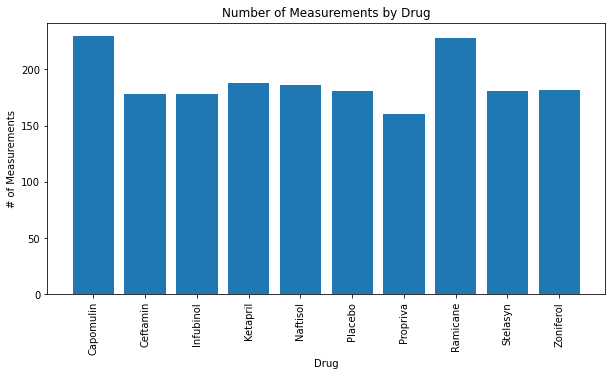

In [71]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot. #avg_state_rain activity as example

plt.figure(figsize=(10,5))
xaxis = np.arange(len(measurements_df))
tick_locations = [value for value in xaxis]
plt.bar(xaxis, measurements_df["count"]) 
plt.xticks(tick_locations, measurements_df["Drug Regimen"], rotation="vertical")
plt.title("Number of Measurements by Drug")
plt.xlabel("Drug")
plt.ylabel("# of Measurements")
plt.show()

In [23]:
#create Mouse ID and sex dataframe

sex_mice_df=clean_mouse_df[["Mouse ID","Sex"]]
distinct_mice_df=sex_mice_df.drop_duplicates()
distinct_mice_df.count()


Mouse ID    249
Sex         249
dtype: int64

In [24]:
#clean data frame to get one line of data per Mouse ID

mice_by_sex=distinct_mice_df.groupby(["Sex"])
count_mice_sex=mice_by_sex.count()
count_mice_sex

,Mouse ID
Sex,
Female,124
Male,125


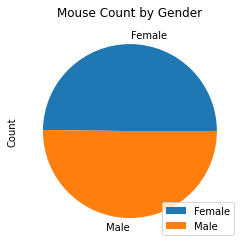

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

count_mice_sex.plot(kind="pie", y='Mouse ID', title = "Mouse Count by Gender")
plt.ylabel("Count")
plt.legend(loc="lower right")


Text(0, 0.5, 'Count')

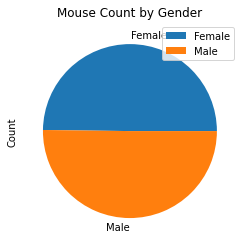

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot=count_mice_sex.plot.pie(y='Mouse ID')
plt.title("Mouse Count by Gender")
plt.ylabel("Count")


## Quartiles, Outliers and Boxplots

In [151]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_group_df=clean_mouse_df.groupby(["Drug Regimen", "Mouse ID"])
drug_tumor_vol=drug_group_df["Tumor Volume (mm3)"].max()
drug_tumor_vol

Drug Regimen  Mouse ID
Capomulin     b128        45.651331
              b742        45.000000
              f966        45.000000
              g288        46.304003
              g316        46.809225
                            ...    
Zoniferol     q633        70.827796
              s337        62.109651
              w140        47.717952
              w575        68.401286
              x613        48.077646
Name: Tumor Volume (mm3), Length: 249, dtype: float64

In [194]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=drug_group_df["Timepoint","Tumor Volume (mm3)"].max().reset_index() 
last_timepoint

C:\Users\roeck\anaconda3\envs\Pythondata\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,45.651331
1,Capomulin,b742,45,45.000000
2,Capomulin,f966,20,45.000000
3,Capomulin,g288,45,46.304003
4,Capomulin,g316,45,46.809225
...,...,...,...,...
244,Zoniferol,q633,45,70.827796
245,Zoniferol,s337,45,62.109651
246,Zoniferol,w140,5,47.717952
247,Zoniferol,w575,45,68.401286


In [196]:
four_drug_df=last_timepoint.loc[Drug Regimen,["Tumor Volume (mm3)"]]
four_drug_df


SyntaxError: invalid syntax (<ipython-input-196-ee273e2a3621>, line 1)

In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)




    

    
 
    
    

    

In [ ]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = xxxx.quartile([.25,.5,.75])
lowerq = quartiles[.25]
upperq=quartiles[.75]
iqr=upperq-lowerq


In [ ]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    

In [ ]:
    # add subset
    

In [ ]:
    # Determine outliers using upper and lower bounds
Lower_bound=Lowerq - (1.5*1qr)
Upper_bound=Upperq + (1.5*1qr)
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [37]:
#source for apply filter: https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

#create subset for Capomulin mice 

Capomulin_filter= clean_mouse_df["Drug Regimen"] == "Capomulin"

Capomulin_filter.sort_values()



0       False
1266    False
1265    False
1264    False
1263    False
        ...  
274      True
275      True
276      True
434      True
293      True
Name: Drug Regimen, Length: 1892, dtype: bool

In [62]:
Campomulin_data=clean_mouse_df[Capomulin_filter]
Campomulin_data.head()
len(Campomulin_data)

230

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_filter = clean_mouse_df["Mouse ID"] == "s185"
mouse_filter.sort_values()

0       False
1269    False
1268    False
1267    False
1266    False
        ...  
16       True
17       True
19       True
10       True
18       True
Name: Mouse ID, Length: 1892, dtype: bool

In [50]:
s185_data=clean_mouse_df[mouse_filter]
s185_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0, 0.5, 'Volume (mm3)')

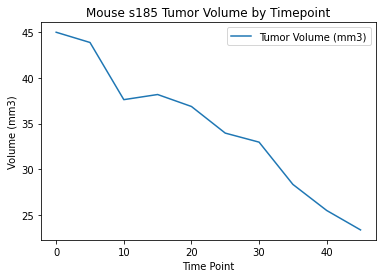

In [60]:
s185_data.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.title("Mouse s185 Tumor Volume by Timepoint")
plt.xlabel("Time Point")
plt.ylabel("Volume (mm3)")

In [69]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_mice= Campomulin_data.groupby(['Mouse ID'])
mouse_volume = Capomulin_mice["Tumor Volume (mm3)"]
mouse_avg_volume=mouse_volume.mean()
mouse_avg_volume

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [70]:
mouse_weight = Capomulin_mice["Weight (g)"]
max_weight=mouse_weight.max()
max_weight

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

Text(0, 0.5, 'Weight (g)')

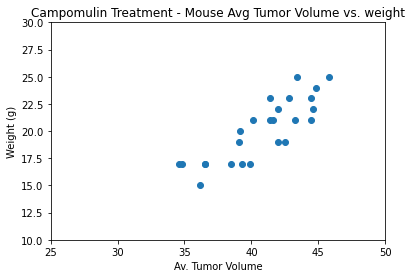

In [85]:
plt.scatter(mouse_avg_volume, max_weight, marker="o")
plt.xlim(25,50)
plt.ylim(10,30)
plt.title("Campomulin Treatment - Mouse Avg Tumor Volume vs. weight")
plt.xlabel("Av. Tumor Volume")
plt.ylabel("Weight (g)")



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation matrix 
# data_corr = campoulin_data.corr()
# data_corr.unstack()['tumor volume'].sort_values()
# gives a matirx for all columns 

In [98]:
correlation=sts.pearsonr(mouse_avg_volume, max_weight)
correlation

(0.8419363424694717, 1.322572243471279e-07)

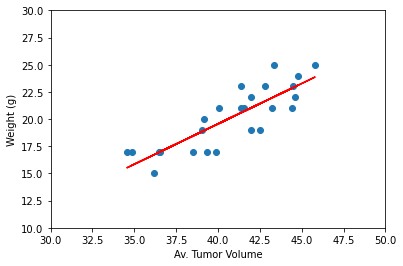

In [93]:
x_values = mouse_avg_volume
y_values = max_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(30,50)
plt.ylim(10,30)
plt.xlabel("Av. Tumor Volume")
plt.ylabel("Weight (g)")
plt.show()

#if we want to display the equation in the scatterplot
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
